# MCDM ranking function using ATA and Cost

## Configuration

#### Import Packages

In [1]:
import matplotlib.pyplot as plt
import mcdm
import pandas as pd
import seaborn as sns

## Define Functions & Classes

In [2]:
def min_max_normalize(iterable):
    """
    Normalize using (Xi - MEDIAN(X)) / STDEV(X) rather than the conventional mean
    Args:
        iterable: some iterable object with floats
    Returns:
        (normalized) iterable
    """
    return [(x - min(iterable)) / (max(iterable) - min(iterable)) for x in iterable]

def mcdm_rank(ata : list, cost : list, provider_names : list,
              cost_weight = 0.5, scoring_method = 'TOPSIS'):
    """
    Generate MCDM ranking based on ata and cost (and their respective weights).
    Inputs are ordered lists of supplier information.
    Args:
        ata: list of ata probabilities (higher is worse)
        cost: list of estimated costs
        provider_names: list of provider names or identifiers
        cost_weight: float between 0 and 1 indicating weight to apply to cost
        scoring_method: scoring method to apply in mcdm algorithm. accepted
                        strings include 'SAW', 'MEW', 'TOPSIS',  'mTOPSIS'.
                        defaults to 'TOPSIS'.
    Returns:
        dictionary with supplier name and ranking
    """
    # Normalize ata, cost and create matrix
    ata_norm = min_max_normalize(ata)
    cost_norm = min_max_normalize(cost)
    ata_cost_matrix = [[ata_norm[i], cost_norm[i]] for i in range(len(ata))]
    
    # Apply MCDM
    mcdm_rankings = mcdm.rank(ata_cost_matrix,
                              w_vector = [(1-cost_weight), cost_weight],
                              s_method = scoring_method,
                              alt_names = provider_names)
    
    # Sort & Return Dictionary
    prov_name = [x[0] for x in mcdm_rankings]
    prov_score = [x[1] for x in mcdm_rankings]
    sorted_providers = [x for _,x in sorted(zip(prov_score, prov_name))]
    output_dict = dict(zip(sorted_providers, list(range(1, len(sorted_providers) + 1))))
    return output_dict

## Data

#### Create Example Data

In [3]:
ata = [0.212, 0.232, 0.293, 0.303, 0.556, 0.576, 0.747, 0.828]
cost = [108.788, 104.747, 80.0, 120.404, 126.465, 98.182, 82.02, 94.141]
acceptance = [0.624, 0.218, 0.131, 0.049, 0.005, 0.001, 0.061, 0.113]
provider_names = [f'Provider {x}' for x in range(1, len(ata) + 1)]

## MCDM Ranking

#### Create Ranks with MCDM

In [4]:
ranks = mcdm_rank(ata = ata, cost = cost, provider_names = provider_names,
                  cost_weight = 0.5, scoring_method = 'TOPSIS')

ranks

{'Provider 3': 1,
 'Provider 2': 2,
 'Provider 1': 3,
 'Provider 7': 4,
 'Provider 6': 5,
 'Provider 4': 6,
 'Provider 8': 7,
 'Provider 5': 8}

## Visualize

In [5]:
rank_df = pd.DataFrame({'provider_name' : list(ranks.keys()), 'mcdm_rank' : list(ranks.values())})
provider_df = pd.DataFrame({'ata' : ata, 'cost' : cost, 'provider_name': provider_names})
ranked_provider_df = provider_df.merge(rank_df, how = 'left', on = ['provider_name'])

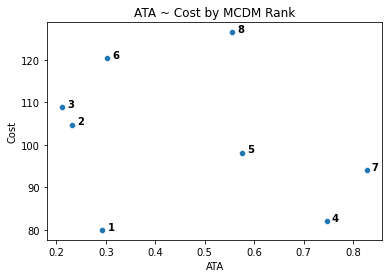

In [6]:
p1 = sns.scatterplot(x = 'ata', y = 'cost', data = ranked_provider_df)
for line in range(0,ranked_provider_df.shape[0]):
     p1.text(ranked_provider_df.ata[line] + 0.01, ranked_provider_df.cost[line], 
     ranked_provider_df.mcdm_rank[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.title('ATA ~ Cost by MCDM Rank')
plt.ylabel('Cost')
plt.xlabel('ATA')
plt.show()